In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("loan-train.csv")


In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data preprocessing and cleaning

In [6]:
# Check for missing values
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Handling missing values in Gender column
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

# Handling missing values in Married column
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

# Handling missing values in Dependents column
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

# Handling missing values in Self_Employed column
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

# Handling missing values in LoanAmount column
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Handling missing values in Loan_Amount_Term column
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

# Handling missing values in Credit_History column
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [8]:
#checking again for missing value
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Exploratory data analysi

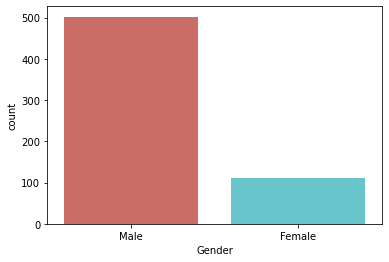

In [10]:
sns.countplot(x="Gender", data=train, palette="hls")
plt.show()

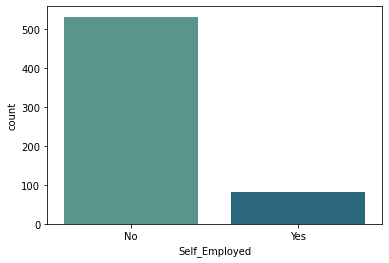

In [11]:
sns.countplot(x="Self_Employed", data=train, palette="crest")
plt.show()

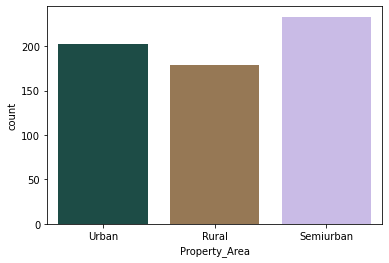

In [12]:
sns.countplot(x="Property_Area", data=train, palette="cubehelix")
plt.show()

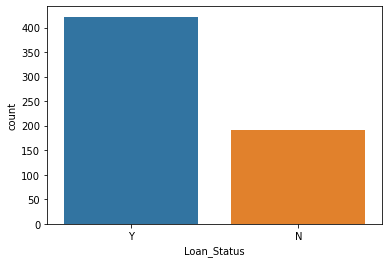

In [13]:
#Check the distribution of Loan_Status
sns.countplot(x='Loan_Status', data=train)
plt.show()

In [14]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

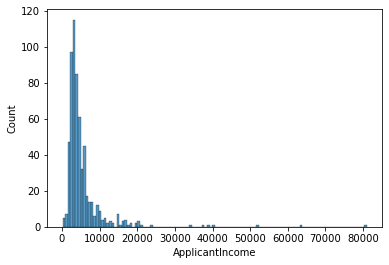

In [15]:
# Check the distribution of ApplicantIncome
sns.histplot(x='ApplicantIncome', data=train)
plt.show()

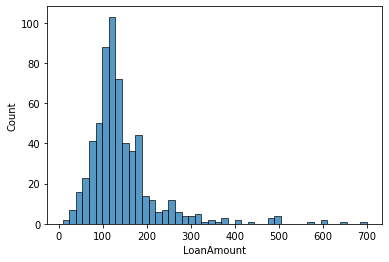

In [16]:
# Check the distribution of LoanAmount
sns.histplot(x='LoanAmount', data=train)
plt.show()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

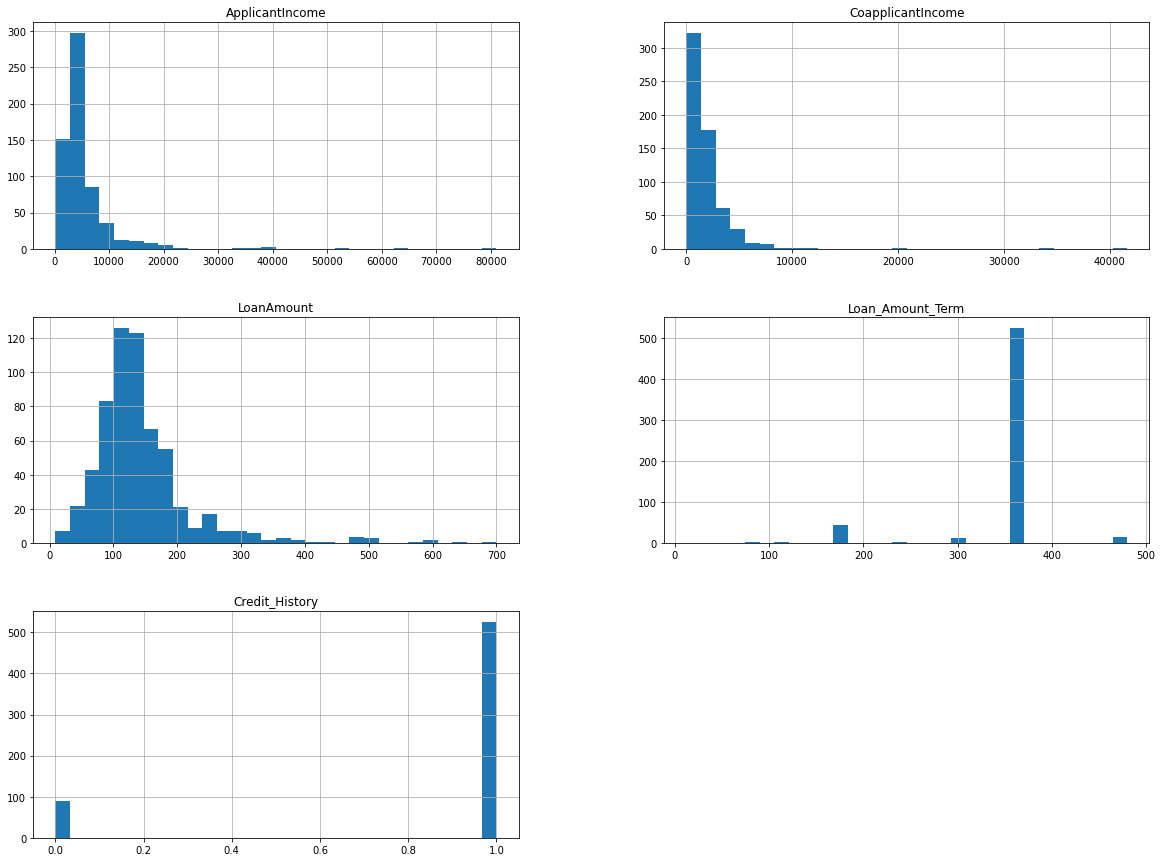

In [17]:
train.hist(bins=30, figsize=(20,15))

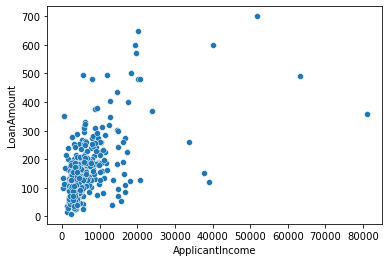

In [18]:
# Check the relationship between ApplicantIncome and LoanAmount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train)
plt.show()

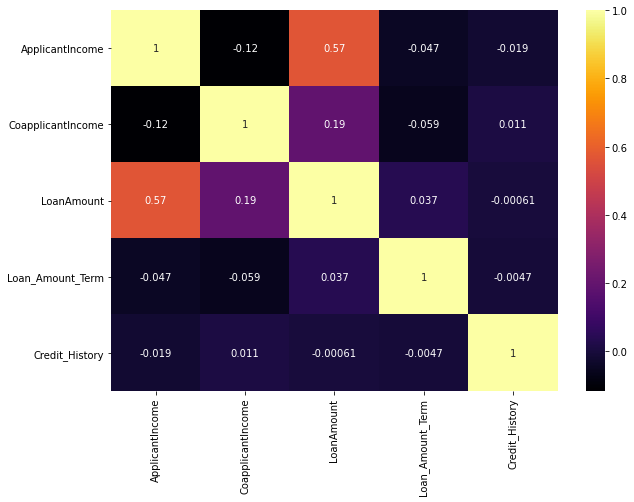

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), annot=True, cmap='inferno');

### Feature engineering

In [20]:
train = train.drop(['Loan_ID'], axis=1)

In [21]:
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0, 'Y': 1})

In [22]:
train = pd.get_dummies(train)

In [23]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [24]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
# Apply sqrt transformation to positively skewed variables
train.ApplicantIncome = np.sqrt(train.ApplicantIncome)
train.CoapplicantIncome = np.sqrt(train.CoapplicantIncome)
train.LoanAmount = np.sqrt(train.LoanAmount)

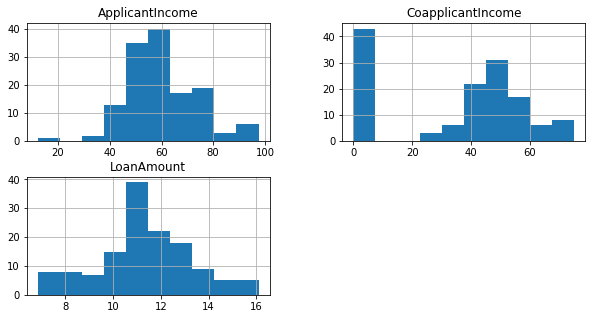

In [26]:
train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(figsize=(10, 5))
plt.show()

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 608
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          136 non-null    float64
 1   CoapplicantIncome        136 non-null    float64
 2   LoanAmount               136 non-null    float64
 3   Loan_Amount_Term         136 non-null    float64
 4   Credit_History           136 non-null    float64
 5   Loan_Status              136 non-null    int64  
 6   Gender_Female            136 non-null    uint8  
 7   Gender_Male              136 non-null    uint8  
 8   Married_No               136 non-null    uint8  
 9   Married_Yes              136 non-null    uint8  
 10  Dependents_0             136 non-null    uint8  
 11  Dependents_1             136 non-null    uint8  
 12  Dependents_2             136 non-null    uint8  
 13  Dependents_3+            136 non-null    uint8  
 14  Education_Graduate       1

In [28]:
# Split the train dataset into features (X) and target variable (y)
X = train.drop(['Loan_Status'], axis=1)
y = train['Loan_Status']


In [29]:
#SMOTE is a technique used for oversampling the minority class in imbalanced datasets.
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [30]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [31]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training and selection

In [32]:

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Train the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:

#Let's now evaluate the performance of each model using accuracy, precision, recall, and F1 score:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Evaluate Logistic Regression
lr_eval = evaluate(logreg, X_val, y_val)

# Evaluate Decision Tree
dt_eval = evaluate(dt, X_val, y_val)

# Evaluate Random Forest
rf_eval = evaluate(rf, X_val, y_val)

# Evaluate XGBoost
xgb_eval = evaluate(xgb, X_val, y_val)

print('Logistic Regression:', lr_eval)
print('Decision Tree:', dt_eval)
print('Random Forest:', rf_eval)
print('XGBoost:', xgb_eval)



Logistic Regression: {'accuracy': 0.6888888888888889, 'precision': 0.625, 'recall': 0.75, 'f1': 0.6818181818181818}
Decision Tree: {'accuracy': 0.7777777777777778, 'precision': 0.75, 'recall': 0.75, 'f1': 0.75}
Random Forest: {'accuracy': 0.9111111111111111, 'precision': 0.9, 'recall': 0.9, 'f1': 0.9}
XGBoost: {'accuracy': 0.9111111111111111, 'precision': 0.9, 'recall': 0.9, 'f1': 0.9}


Based on these results, it appears that the Random Forest model had the highest overall performance, achieving the highest accuracy, precision, recall, and F1 score. The Decision Tree model had the second-highest performance, followed by XGBoost and Logistic Regression, respectively.

In [34]:
#Computing the average and standard deviation of the performance metrics using cross-validation techniques

from sklearn.model_selection import cross_validate

# Evaluate the model using 10-fold cross-validation and multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring)

# Print the mean and standard deviation of each metric across all folds
print("Accuracy: {:.3f} ± {:.3f}".format(cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std()))
print("Precision: {:.3f} ± {:.3f}".format(cv_results['test_precision'].mean(), cv_results['test_precision'].std()))
print("Recall: {:.3f} ± {:.3f}".format(cv_results['test_recall'].mean(), cv_results['test_recall'].std()))
print("F1 score: {:.3f} ± {:.3f}".format(cv_results['test_f1'].mean(), cv_results['test_f1'].std()))


Accuracy: 0.835 ± 0.122
Precision: 0.867 ± 0.131
Recall: 0.822 ± 0.127
F1 score: 0.836 ± 0.109


## Using this model to make prediction on test data set

In [35]:
test = pd.read_csv("loan-test.csv")

In [36]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [37]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
# Handling missing values in Gender column
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

# Handling missing values in Married column
test['Married'].fillna(test['Married'].mode()[0], inplace=True)

# Handling missing values in Dependents column
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

# Handling missing values in Self_Employed column
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

# Handling missing values in LoanAmount column
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

# Handling missing values in Loan_Amount_Term column
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

# Handling missing values in Credit_History column
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [39]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [40]:
test = test.drop(['Loan_ID'], axis=1)

In [41]:
test = pd.get_dummies(test)

In [42]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


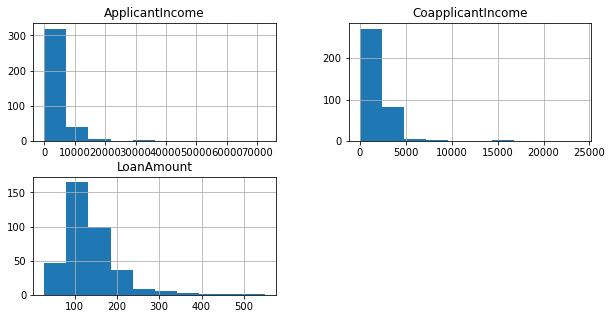

In [43]:
test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(figsize=(10, 5))
plt.show()

In [44]:
# Apply sqrt transformation to positively skewed variables
test.ApplicantIncome = np.sqrt(test.ApplicantIncome)
test.CoapplicantIncome = np.sqrt(test.CoapplicantIncome)
test.LoanAmount = np.sqrt(test.LoanAmount)

In [45]:
test = MinMaxScaler().fit_transform(test)

In [46]:
import joblib

# Save the trained model
joblib.dump(rf, 'loan_approval_model.pkl')

# Load the saved model
loaded_model = joblib.load('loan_approval_model.pkl')

# Use the loaded model to make predictions on new data
new_y_pred = loaded_model.predict(test)


In [47]:
# Map 1 to 'Y' and 0 to 'N' for the Loan_Status column
submission_df = pd.DataFrame({'Loan_Status': new_y_pred})
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the DataFrame to a CSV file
submission_df.to_csv('loan_approval_submission.csv', index=False)